In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [58]:
train  = pd.read_csv('C:/greyatom/greyatom-ml/Hackathon 2/data/train.csv')
test = pd.read_csv('C:/greyatom/greyatom-ml/Hackathon 2/data/test.csv')

In [59]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [60]:
train['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [62]:
test.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
tweet_id    1819 non-null int64
tweet       1819 non-null object
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


In [64]:
joint_train_test = train.append(test, ignore_index=True)

In [65]:
joint_train_test.head()

,sentiment,tweet,tweet_id
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701
1,1.0,Learning ab Google doodles! All doodles should...,1851
2,2.0,one of the most in-your-face ex. of stealing t...,2689
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525
4,1.0,Line outside the Apple store in Austin waiting...,3604


In [66]:
joint_train_test.shape

(9093, 3)

#### Remove punctuations and special characters from "train" and "test" data

In [67]:
joint_train_test['clean_tweet'] = joint_train_test['tweet'].str.replace("[^a-zA-Z@#]", " ")
joint_train_test.head(10)

,sentiment,tweet,tweet_id,clean_tweet
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,#sxswnui #sxsw #apple defining language of tou...
1,1.0,Learning ab Google doodles! All doodles should...,1851,Learning ab Google doodles All doodles should...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,one of the most in your face ex of stealing t...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,This iPhone #SXSW app would b pretty awesome i...
4,1.0,Line outside the Apple store in Austin waiting...,3604,Line outside the Apple store in Austin waiting...
5,1.0,#technews One lone dude awaits iPad 2 at Apple...,966,#technews One lone dude awaits iPad at Apple...
6,1.0,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1395,SXSW Tips Prince NPR Videos Toy Shopping Wi...
7,1.0,NU user RT @mention New #UberSocial for #iPhon...,8182,NU user RT @mention New #UberSocial for #iPhon...
8,2.0,Free #SXSW sampler on iTunes {link} #FreeMusic,8835,Free #SXSW sampler on iTunes link #FreeMusic
9,2.0,I think I might go all weekend without seeing ...,883,I think I might go all weekend without seeing ...


#### Remove twitter handles from "train" and "test" data

In [68]:
joint_train_test['tweet'] = joint_train_test['tweet'].astype(str)   ###Converted tweet column as string

In [69]:
def clean_pattern(input_data, pattern):
    r = re.findall(pattern, input_data)
    for i in r:
        input_data = re.sub(i, '', input_data)
        
    return input_data

In [70]:
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].astype(str)   ###Converted tweet column as string

In [71]:
joint_train_test['clean_tweet'] = np.vectorize(clean_pattern)(joint_train_test['clean_tweet'], "@[\w]*")

In [72]:
joint_train_test.head()

,sentiment,tweet,tweet_id,clean_tweet
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,#sxswnui #sxsw #apple defining language of tou...
1,1.0,Learning ab Google doodles! All doodles should...,1851,Learning ab Google doodles All doodles should...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,one of the most in your face ex of stealing t...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,This iPhone #SXSW app would b pretty awesome i...
4,1.0,Line outside the Apple store in Austin waiting...,3604,Line outside the Apple store in Austin waiting...


#### Removing stop/short words

In [73]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

#### Convert tweets into lowercase

In [74]:
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].str.lower()  

In [75]:
joint_train_test.head()

,sentiment,tweet,tweet_id,clean_tweet
0,1.0,#sxswnui #sxsw #apple defining language of tou...,1701,#sxswnui #sxsw #apple defining language of tou...
1,1.0,Learning ab Google doodles! All doodles should...,1851,learning ab google doodles all doodles should...
2,2.0,one of the most in-your-face ex. of stealing t...,2689,one of the most in your face ex of stealing t...
3,0.0,This iPhone #SXSW app would b pretty awesome i...,4525,this iphone #sxsw app would b pretty awesome i...
4,1.0,Line outside the Apple store in Austin waiting...,3604,line outside the apple store in austin waiting...


In [25]:
stop_words = set(stopwords.words('english')) 
for word in stop_words:
  print(word)

that'll
those
for
myself
with
below
wouldn't
and
over
where
when
her
our
both
are
so
being
that
wasn
hers
during
all
then
ma
out
yourself
your
re
ll
weren
of
in
she
yours
mightn't
who
didn't
don't
himself
between
from
needn
against
hadn
won
my
doing
me
before
off
couldn't
hasn't
while
aren
most
am
about
yourselves
wasn't
ours
few
herself
m
did
don
haven
you'd
very
she's
whom
because
at
we
doesn
can
which
o
further
mustn't
shouldn
it's
any
d
mightn
these
a
after
ve
were
he
be
isn't
couldn
wouldn
has
shouldn't
under
other
doesn't
does
you've
down
too
why
won't
such
shan
haven't
or
aren't
theirs
if
than
you're
isn
an
there
ain
didn
him
having
mustn
weren't
their
it
as
more
nor
do
again
here
up
you'll
this
you
the
them
only
own
above
how
s
was
had
each
into
been
hasn
needn't
its
by
will
have
now
they
just
not
what
t
is
once
should
shan't
y
on
should've
until
ourselves
through
itself
themselves
no
i
same
some
hadn't
but
his
to


#### Creating Word Tokens

In [76]:
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].astype(str)   ###Converted clean_tweet column as string

In [77]:
word_tokens = joint_train_test['clean_tweet']

In [78]:
print(type(word_tokens))

<class 'pandas.core.series.Series'>


In [79]:
joint_train_test['clean_tweet'].shape

(9093,)

In [30]:
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

In [80]:
joint_train_test['clean_tweet'].head(20)

0     #sxswnui #sxsw #apple defining language of tou...
1     learning ab google doodles  all doodles should...
2     one of the most in your face ex  of stealing t...
3     this iphone #sxsw app would b pretty awesome i...
4     line outside the apple store in austin waiting...
5     #technews one lone dude awaits ipad   at apple...
6     sxsw tips  prince  npr videos  toy shopping wi...
7     nu user rt  new #ubersocial for #iphone now in...
8        free #sxsw sampler on itunes  link  #freemusic
9     i think i might go all weekend without seeing ...
10    rt  official #sxsw app    sxsw go    bit ly hm...
11    it s official  i m buying an ipad  #sxsw #elevate
12    they re giving away ipad   s  x boxes and book...
13    rt  we re officially at #sxsw  come by the  gr...
14    #companies to watch  from the #sxsw trade show...
15    rt  google marissa mayer  future of location  ...
16    dl the #calyp app to get into #calyp casa at #...
17    well yeah   music  gt  iphone nerds rt  my

In [81]:
tokenized_tweet = joint_train_test['clean_tweet'].apply(lambda x: x.split()) # tokenizing

In [82]:
tokenized_tweet.head()

0    [#sxswnui, #sxsw, #apple, defining, language, ...
1    [learning, ab, google, doodles, all, doodles, ...
2    [one, of, the, most, in, your, face, ex, of, s...
3    [this, iphone, #sxsw, app, would, b, pretty, a...
4    [line, outside, the, apple, store, in, austin,...
Name: clean_tweet, dtype: object

In [33]:
tokenized_tweet.shape

(9093,)

#### Stemming

In [83]:
from nltk.stem.porter import *

In [84]:
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [85]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
joint_train_test['clean_tweet'] = tokenized_tweet

In [86]:
joint_train_test['clean_tweet'].head()

0    #sxswnui #sxsw #appl defin languag of touch wi...
1    learn ab googl doodl all doodl should be light...
2    one of the most in your face ex of steal the s...
3    thi iphon #sxsw app would b pretti awesom if i...
4    line outsid the appl store in austin wait for ...
Name: clean_tweet, dtype: object

In [87]:
joint_train_test['clean_tweet'][203]          ###### In below tweet, "loving" transformed into "love"

'aliv and love it great talk from jonathan dahl #minimalistprogram and googl s marissa mayer #marissagoogl #sxsw'

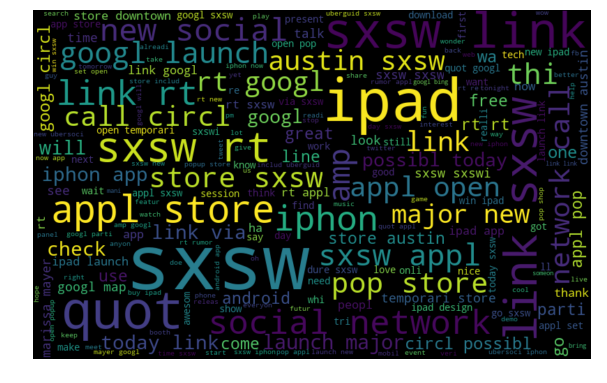

In [88]:
all_words = ' '.join([text for text in joint_train_test['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Removing unwanted short words of length < 3 except "go"

In [49]:
short_words = joint_train_test['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<3 and w != 'go']))

In [51]:
short_words.to_csv('C:/greyatom/greyatom-ml/Hackathon 2/data/short_words.csv', index=False)

In [89]:
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w == 'go']))

In [90]:
joint_train_test['clean_tweet'].head()

0    #sxswnui #sxsw #appl defin languag touch with ...
1    learn googl doodl all doodl should light funni...
2    one the most your face steal the show quot #sx...
3    thi iphon #sxsw app would pretti awesom didn c...
4    line outsid the appl store austin wait for the...
Name: clean_tweet, dtype: object

#### Suppressing the duplicate words from WordCloud   ("collocations=False")

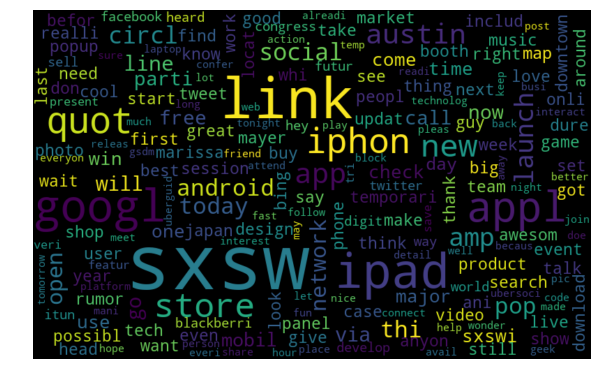

In [91]:
all_words1 = ' '.join([text for text in joint_train_test['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, collocations=False, max_font_size=110).generate(all_words1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

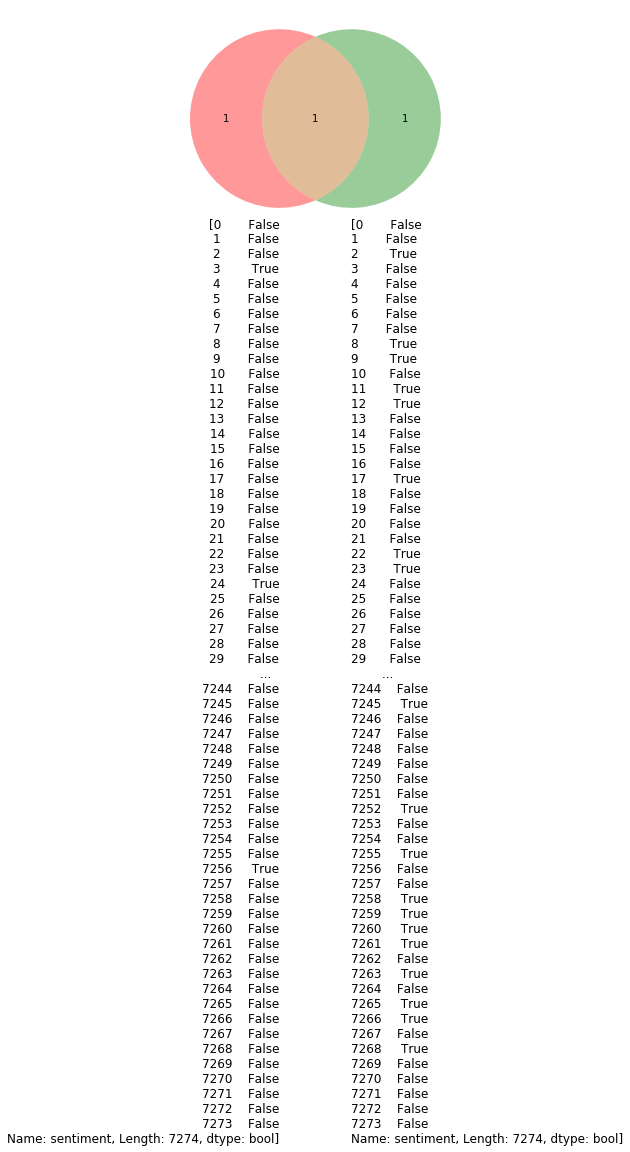

In [254]:
v = vplt.venn2(subsets={'10':1, '01':1, '11':1}, set_labels=([joint_train_test['sentiment'] == 0],[joint_train_test['sentiment'] == 2]))

#### WordCloud with Sentiment 0 (Negative)

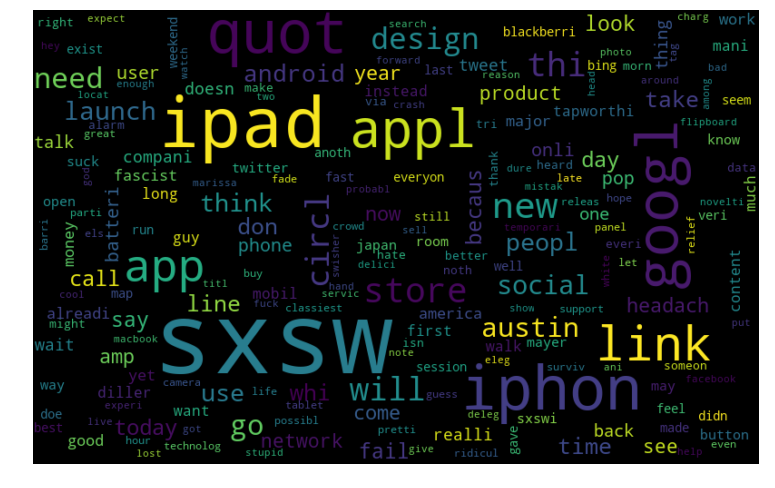

In [92]:
negative_words =' '.join([text for text in joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, collocations=False, max_font_size=110).generate(negative_words)

plt.figure(figsize=(13, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


#### WordCloud with Sentiment 1 (Neutral)

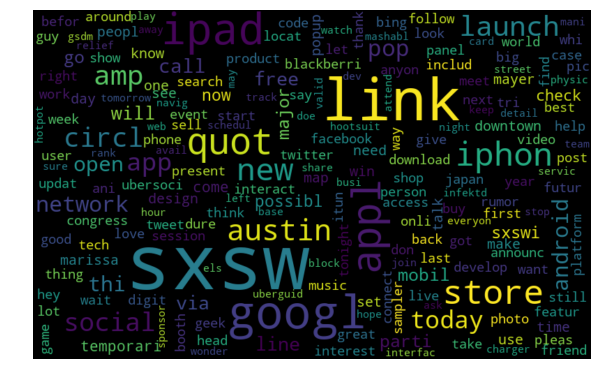

In [93]:
neutral_words =' '.join([text for text in joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, collocations=False, max_font_size=110).generate(neutral_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


#### WordCloud with Sentiment 2 (Positive)

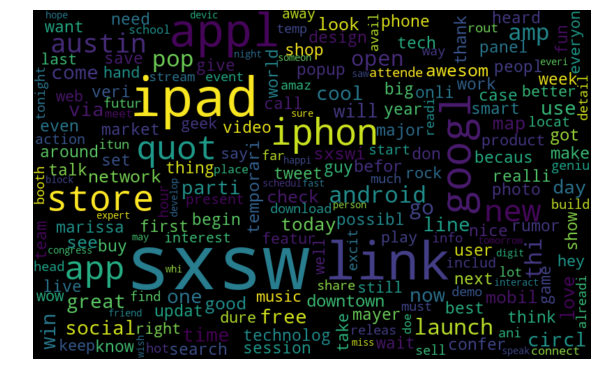

In [94]:
positive_words =' '.join([text for text in joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 2]])
wordcloud = WordCloud(width=800, height=500, random_state=21, collocations=False, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### function to collect hashtags

In [95]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [96]:
hashtag_negative = hashtag_extract(joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 0])
hashtag_neutral = hashtag_extract(joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 1])
hashtag_positive = hashtag_extract(joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 2])
hashtag_unknown = hashtag_extract(joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 3])

In [97]:
hashtag_negative = sum(hashtag_negative,[])
hashtag_neutral = sum(hashtag_neutral,[])
hashtag_positive = sum(hashtag_positive,[])
hashtag_unknown = sum(hashtag_unknown,[])

#### Plot freqency distribution

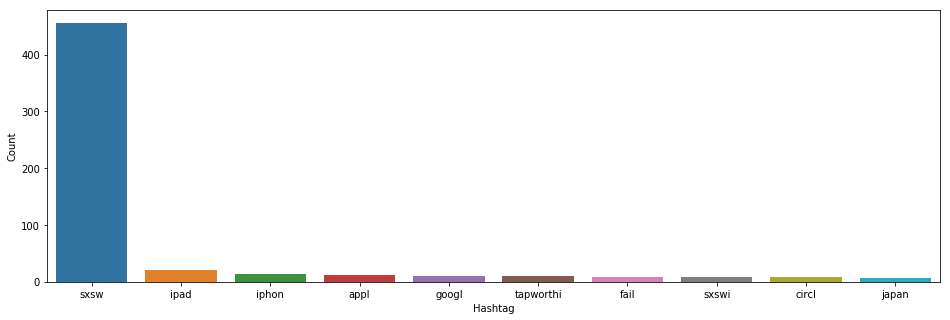

In [98]:
a = nltk.FreqDist(hashtag_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

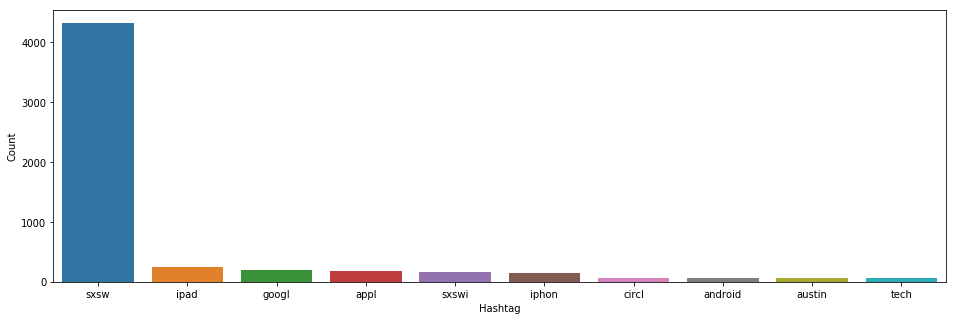

In [99]:
a = nltk.FreqDist(hashtag_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

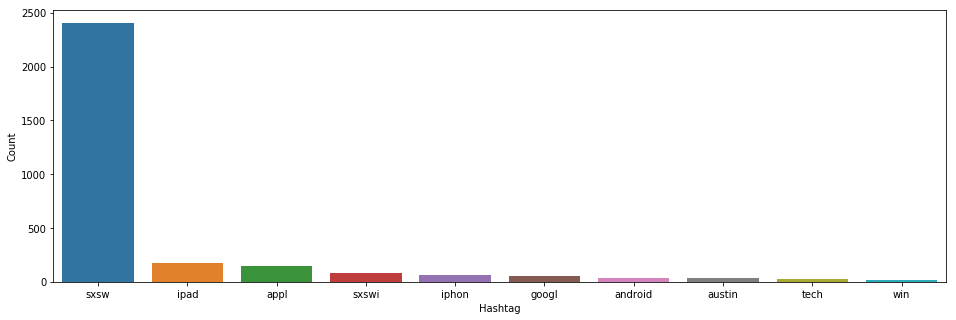

In [100]:
a = nltk.FreqDist(hashtag_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

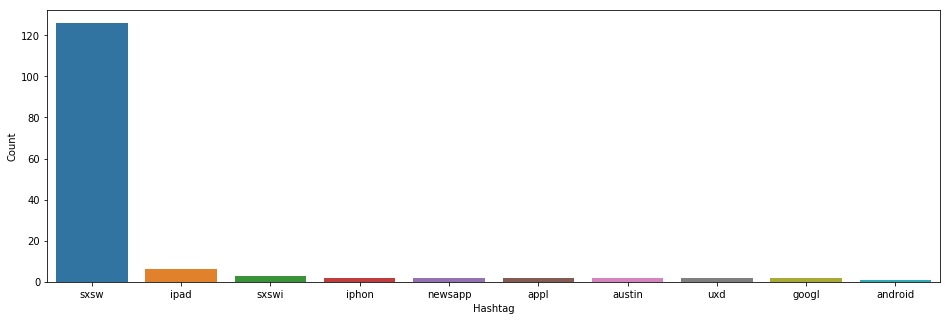

In [101]:
a = nltk.FreqDist(hashtag_unknown)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Removing freqent words

In [102]:
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].str.replace("sxsw", " ")
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].str.replace("ipad", " ")
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].str.replace("iphon", " ")
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].str.replace("appl", " ")
joint_train_test['clean_tweet'] = joint_train_test['clean_tweet'].str.replace("googl", " ")

In [103]:
hashtag_negative = hashtag_extract(joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 0])
hashtag_neutral = hashtag_extract(joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 1])
hashtag_positive = hashtag_extract(joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 2])
hashtag_unknown = hashtag_extract(joint_train_test['clean_tweet'][joint_train_test['sentiment'] == 3])

In [104]:
hashtag_negative = sum(hashtag_negative,[])
hashtag_neutral = sum(hashtag_neutral,[])
hashtag_positive = sum(hashtag_positive,[])
hashtag_unknown = sum(hashtag_unknown,[])

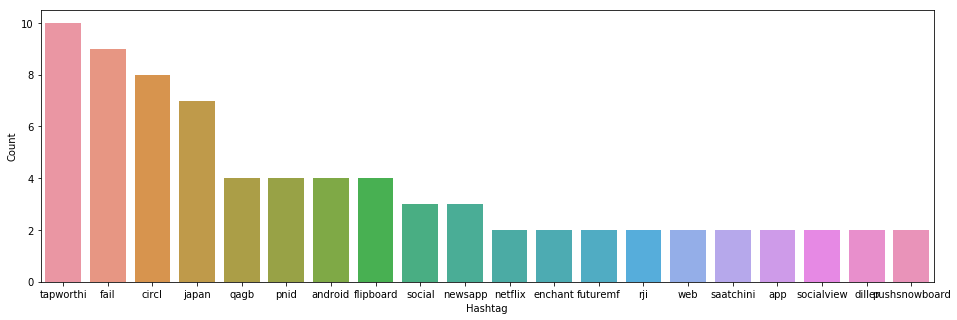

In [105]:
a = nltk.FreqDist(hashtag_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

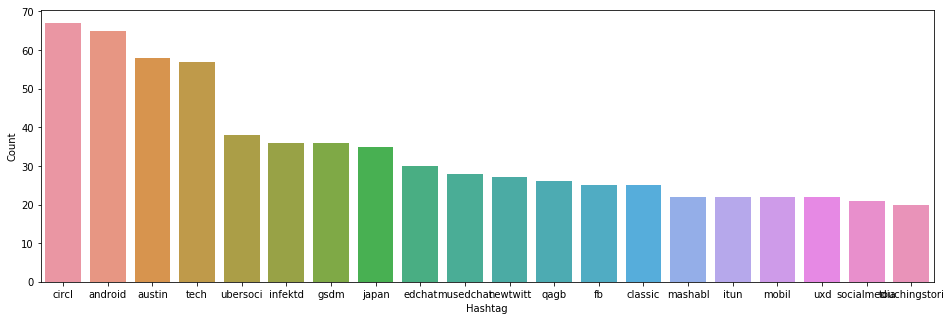

In [106]:
a = nltk.FreqDist(hashtag_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

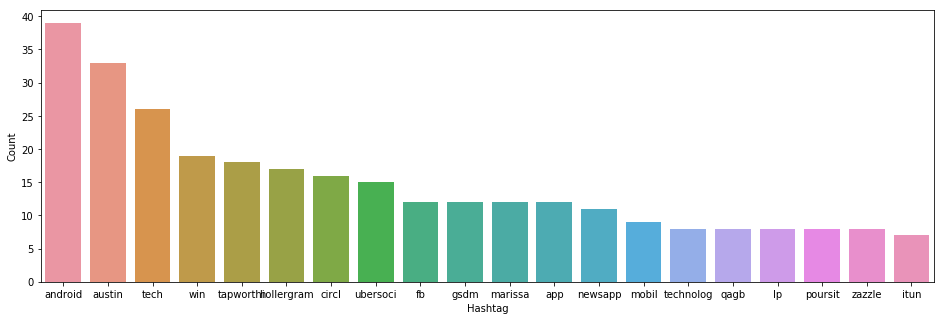

In [107]:
a = nltk.FreqDist(hashtag_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

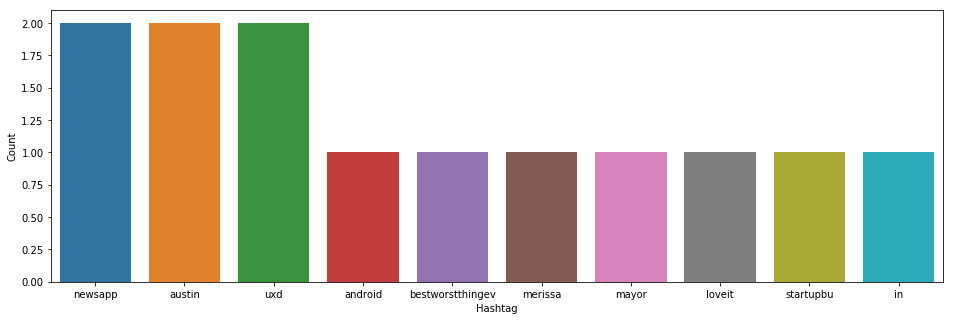

In [108]:
a = nltk.FreqDist(hashtag_unknown)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [117]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
vector_tfidf = tfidf_vectorizer.fit_transform(joint_train_test['clean_tweet'])
X_tfidf = vector_tfidf.toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Bag of words

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [119]:
train_tfidf = vector_tfidf[:7274,:]
test_tfidf = vector_tfidf[7274:,:]

# splitting data into training and validation set
xtrain_tfidf, xtest_tfidf, ytrain, ytest = train_test_split(train_tfidf, train['sentiment'],  
                                                          random_state=42, 
                                                          test_size=0.3)

#### Logistic Regression

In [120]:
lreg = LogisticRegression(random_state=42)
lreg.fit(xtrain_tfidf, ytrain) # training the model

prediction = lreg.predict_proba(xtest_tfidf) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)


In [121]:
f1_score(ytest, prediction_int, average='weighted') # calculating f1 score

C:\Users\GS186041\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.46733158428073696

#### Support vector machine

In [122]:
from sklearn import svm

In [123]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xtest_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(ytest, prediction_int, average='weighted')

C:\Users\GS186041\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4713106180123171

#### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xtest_tfidf)
f1_score(ytest, prediction, average='weighted')

0.642124018296966

#### XgBoost (eXtreme Gradient Boosting)

In [126]:
from xgboost import XGBClassifier

In [127]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb_model.predict(xtest_tfidf)
f1_score(ytest, prediction, average='weighted')

0.6555094566564301

#### GridSearchCV

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
gscv = GridSearchCV(LogisticRegression(), {}, cv=5, verbose=3).fit(xtrain_tfidf, ytrain)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] ....................... , score=0.6647058823529411, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.6575073601570167, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.6719056974459725, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.6509341199606686, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.6666666666666666, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [135]:
gscv.best_score_

0.6623453152622275

In [136]:
prediction = gscv.predict(xtest_tfidf)

In [137]:
f1_score(ytest, prediction, average='weighted')

C:\Users\GS186041\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6141470681551243

#### Tuning XGBoost model

In [247]:
PARAMS1 = {'colsample': 0.9,
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators':1000,
 'min_child_weight': 6,
 'objective': 'reg:linear',
 'subsample': 0.9}

In [248]:
xgb_model = XGBClassifier(params=PARAMS1, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb_model.predict(xtest_tfidf)
f1_score(ytest, prediction, average='weighted')

0.6302880611349015

#### Code to export csv

In [ ]:
test_pred = rf.predict(test_tfidf)
test['sentiment'] = test_pred
submission = test[['tweet_id','sentiment']]
submission.to_csv('C:/greyatom/greyatom-ml/Hackathon 2/data/sub_rf_bow.csv', index=False)